https://github.com/krishnaik06/Fake-News-Classifier/blob/master/FakeNewsClassifier%20TFIDF.ipynb

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_test.shape

(5200, 4)

In [5]:
df

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [6]:
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [7]:
df.shape

(20800, 5)

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.shape

(18285, 5)

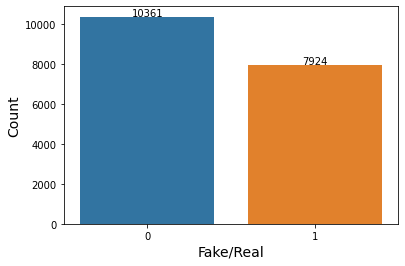

In [11]:
# Visual displays are always better to get a good 
# understanding of the quantities of categories.
# Display a plot of the categories
plt.figure(figsize=(6, 4))
count = df.label.value_counts()
splot=sns.barplot(x=count.index,y=count)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points')
plt.xlabel("Fake/Real", size=14)
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
plt.show()

In [12]:
# uncomment this to create smaller datasets

# df_true = df[df.label == 0 ]
# df_fake = df[df.label == 1 ]
# df_true=df_true.iloc[:2000,:]
# df_fake=df_fake.iloc[:2000,:]

## Concatenate Real and Fake News

#df = pd.concat([df_true, df_fake]).reset_index(drop = True)


In [13]:
# uncomment this to run on smaller datasets

# Removes all non-alphabetic characters, except 'space'
# Changes the word to lower case
# Stems the word and adds it to the corpus if it longer than 3 characters

# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(df)):
#     text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     text = text.lower()
#     text = text.split()
    
#     text = [ps.stem(word) for word in text if not word in stopwords.words('english') and len(word) > 3]
#     text = ' '.join(text)
#     corpus.append(text)

In [14]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [16]:
# Apply the function to the dataframe
df['clean'] = df['text'].apply(preprocess)

C:\Users\glavoy\AppData\Local\Temp/ipykernel_17076/3482690016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['text'].apply(preprocess)


In [17]:
# Show original news
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [18]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['house', 'aide', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'october', 'subscribe', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'creative', 'commons', 'license', 'apologies', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'week', 'director', 'james', 'comey', 'according', 'house', 'democratic', 'aide', 'looks', 'like', 'know', 'second', 'worst', 'person', 'turns', 'comey', 'sent', 'infamous', 'letter', 'announcing', 'looking', 'emails', 'related', 'hillary', 'clinton', 'email', 'server', 'ranking', 'democrats', 'relevant', 'committees', 'hear', 'comey', 'tweet', 'republican', 'committee', 'chairmen', 'know', 'comey', 'notified', 'republican', 'chairmen', 'democratic', 'ranking', 'members', 'house', 'intelligence', 'judiciary', 'oversight', 'committees', 'agency', 'reviewing', 'emails', 'recently', 'discovered', 'order', 'contained', 'classified', 'information', 'long', 'letter'

In [19]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

C:\Users\glavoy\AppData\Local\Temp/ipykernel_17076/752335802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))


In [20]:
from wordcloud import WordCloud, STOPWORDS

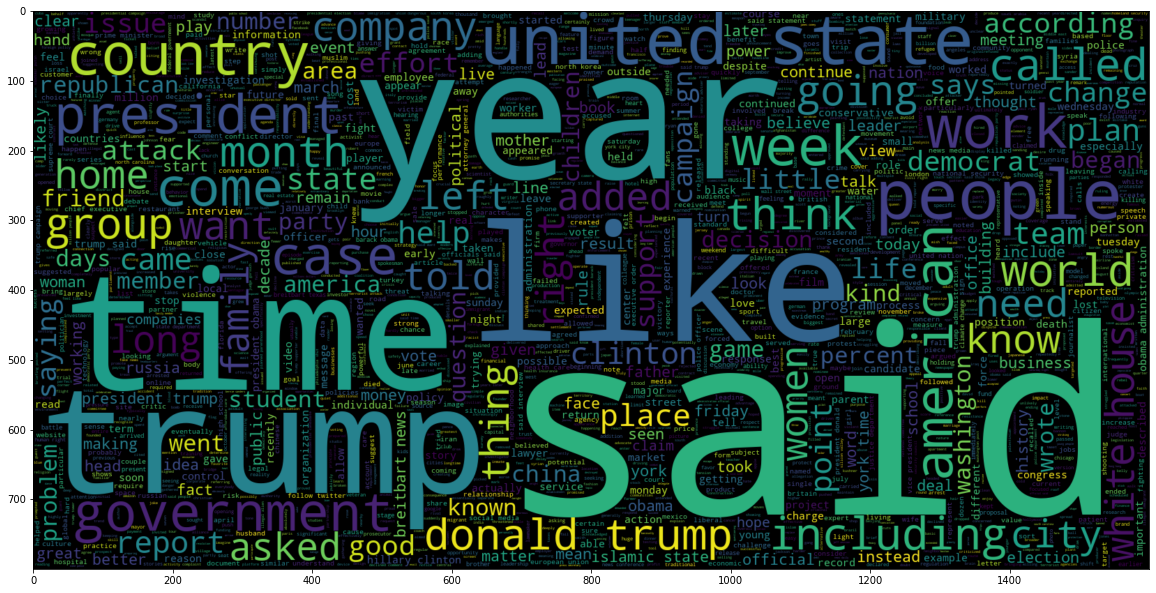

In [21]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

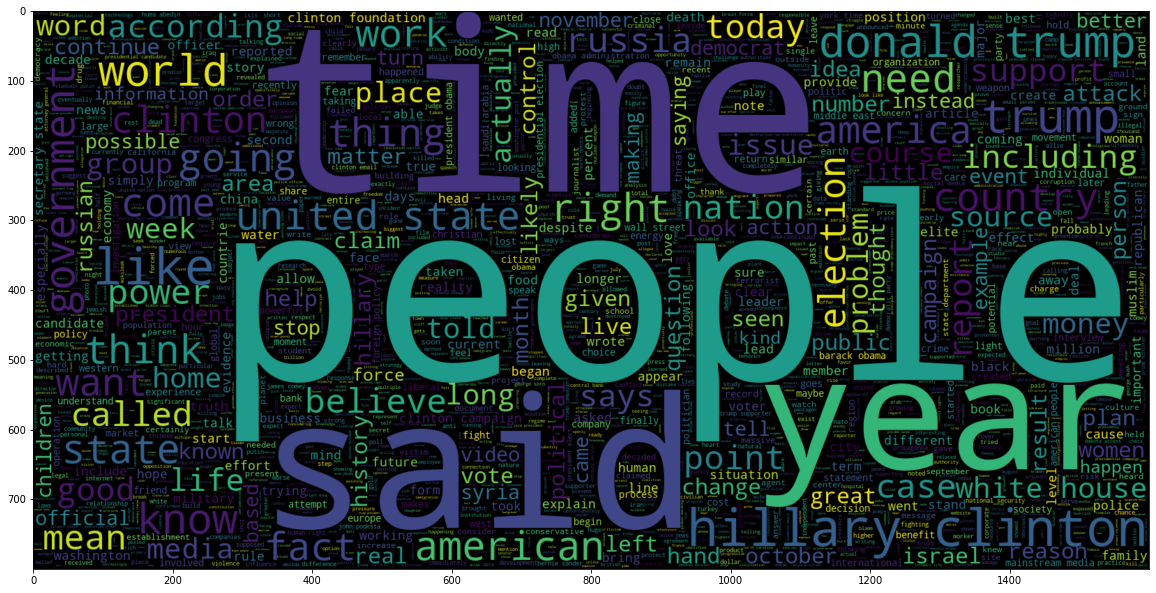

In [22]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [23]:
import nltk

In [24]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 13682


In [25]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [26]:
# May want to consider lemmatizing
#############################################

# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import re
# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [27]:
# lemmatizing
#############################################

# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re
# lemmatizer = WordNetLemmatizer()

# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     review = review.lower()
#     review = review.split()
    
#     review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review) 

In [28]:
# from nltk.corpus import stopwords
# import re

# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     review = review.lower()
#     review = review.split()
    
#     review = [word for word in review if word not in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review) 

In [29]:
## TFidf Vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_v=TfidfVectorizer(max_features=2000,ngram_range=(1,3))
# X=tfidf_v.fit_transform(corpus).toarray()

In [30]:
## TFidf Vectorizer - use df['clean_joined'] column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=2000,ngram_range=(1,3))
X=tfidf_v.fit_transform(df['clean_joined']).toarray()

In [31]:
X.shape

(18285, 2000)

In [32]:
## Get the Dependent features
y=df['label']

In [33]:
y.shape

(18285,)

In [34]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
tfidf_v.get_feature_names_out()[:20]

array(['abedin', 'ability', 'able', 'abortion', 'abroad', 'absolutely',
       'abuse', 'accept', 'access', 'according', 'account', 'accounts',
       'accusations', 'accused', 'acknowledged', 'acting', 'action',
       'actions', 'active', 'activist'], dtype=object)

In [36]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [37]:
count_df.head()

abedin  ability      able  abortion  abroad  absolutely  abuse  accept  \
0     0.0      0.0  0.000000       0.0     0.0         0.0    0.0     0.0   
1     0.0      0.0  0.000000       0.0     0.0         0.0    0.0     0.0   
2     0.0      0.0  0.021614       0.0     0.0         0.0    0.0     0.0   
3     0.0      0.0  0.000000       0.0     0.0         0.0    0.0     0.0   
4     0.0      0.0  0.000000       0.0     0.0         0.0    0.0     0.0   

   access  according  ...  yemen  york  york city  york times     young  \
0     0.0   0.000000  ...    0.0   0.0        0.0         0.0  0.000000   
1     0.0   0.000000  ...    0.0   0.0        0.0         0.0  0.000000   
2     0.0   0.016060  ...    0.0   0.0        0.0         0.0  0.022848   
3     0.0   0.083584  ...    0.0   0.0        0.0         0.0  0.000000   
4     0.0   0.047653  ...    0.0   0.0        0.0         0.0  0.000000   

   younger  youtube  zero  zika      zone  
0      0.0      0.0   0.0   0.0  0.000000  
1      0.0      0.0   0.0   0.0  0.000000  
2      0.0      0.0   0.0   0.0  0.066858  
3      0.0      0.0   0.0   0.0  0.000000  
4      0.0      0.0   0.0   0.0  0.000000  

[5 rows x 2000 columns]

In [38]:
import matplotlib.pyplot as plt

In [39]:
# This function is used to create a confusion matrix
# It is used a few times later on
# It is from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    fig, ax = plt.subplots(figsize=(5,5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
from sklearn.metrics import classification_report

In [41]:
# This function is used to fit the model and
# display the metrics.
# It also shows the confusion matrix
def show_classifier_info(classifier):
    classifier.fit(X_train, y_train)

    # Get predicted results
    pred = classifier.predict(X_test)

    # And pring the classification_report (precision, recall, f1-score)
    print(classification_report(y_test, pred,target_names=['FAKE', 'REAL']))   
    
    # And show the confusion matrix as well
    cm = metrics.confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Feature extraction (vectorization) : Build Bag-Of-Words model using CountVectorizer and TfidfVectorizer.

## Multinomial Naive Bayes Algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
from sklearn import metrics
import numpy as np
import itertools

              precision    recall  f1-score   support

        FAKE       0.83      0.94      0.88      2040
        REAL       0.91      0.76      0.83      1617

    accuracy                           0.86      3657
   macro avg       0.87      0.85      0.86      3657
weighted avg       0.87      0.86      0.86      3657

Confusion matrix, without normalization


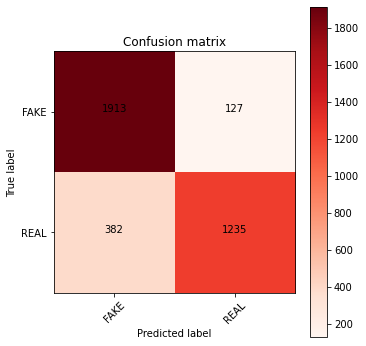

In [44]:
# Set the classifier to Naive Bayes
classifier=MultinomialNB()
# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Support Vector Machine

In [45]:
# For Support Vector Machine
from sklearn.linear_model import SGDClassifier

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93      2040
        REAL       0.93      0.89      0.91      1617

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657

Confusion matrix, without normalization


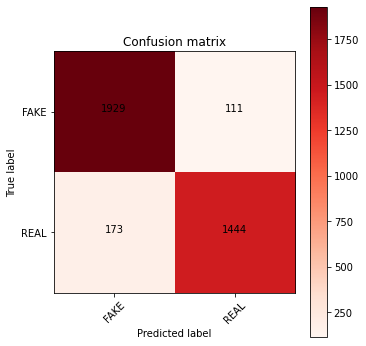

In [46]:
# Set the classifier for the Support Vector Machine
classifier=SGDClassifier(loss='hinge',
                         penalty='l2',
                         alpha=1e-3,
                         random_state=42,
                         max_iter=10,
                         tol=None)

# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Logistic Regression

In [47]:
# For Logistic Regression
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

        FAKE       0.90      0.91      0.91      2040
        REAL       0.89      0.87      0.88      1617

    accuracy                           0.89      3657
   macro avg       0.89      0.89      0.89      3657
weighted avg       0.89      0.89      0.89      3657

Confusion matrix, without normalization


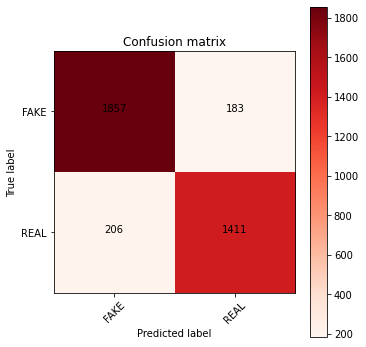

In [48]:
# Set the classifier for Logistic Regression
classifier=LogisticRegression(n_jobs=1, C=1e5, max_iter=5000)

# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Decision Tree

In [49]:
from sklearn import tree

              precision    recall  f1-score   support

        FAKE       0.87      0.87      0.87      2040
        REAL       0.84      0.83      0.84      1617

    accuracy                           0.85      3657
   macro avg       0.85      0.85      0.85      3657
weighted avg       0.85      0.85      0.85      3657

Confusion matrix, without normalization


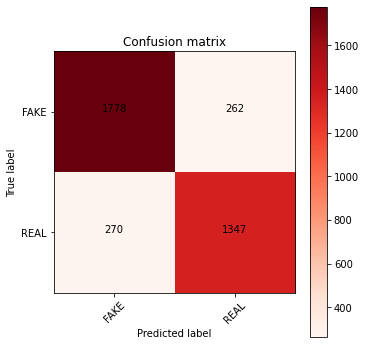

In [50]:
classifier = tree.DecisionTreeClassifier(random_state=17)
# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

# Bag of Words

In [51]:
# Creating the Bag of Words model
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 500)
# X = cv.fit_transform(corpus).toarray()

In [52]:
# Creating the Bag of Words model - use df['clean_joined']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(df['clean_joined']).toarray()

In [53]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Multinomial Naive Bayes Algorithm

              precision    recall  f1-score   support

        FAKE       0.84      0.89      0.86      2040
        REAL       0.85      0.78      0.81      1617

    accuracy                           0.84      3657
   macro avg       0.84      0.84      0.84      3657
weighted avg       0.84      0.84      0.84      3657

Confusion matrix, without normalization


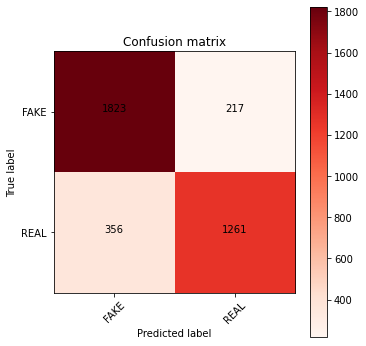

In [54]:
# Set the classifier to Naive Bayes
classifier=MultinomialNB()

# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Support Vector Machine

              precision    recall  f1-score   support

        FAKE       0.91      0.93      0.92      2040
        REAL       0.91      0.88      0.89      1617

    accuracy                           0.91      3657
   macro avg       0.91      0.90      0.90      3657
weighted avg       0.91      0.91      0.91      3657

Confusion matrix, without normalization


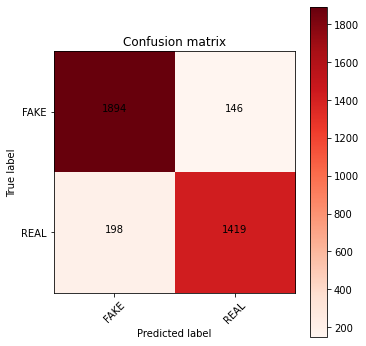

In [55]:
# Set the classifier for the Support Vector Machine
classifier=SGDClassifier(loss='hinge',
                         penalty='l2',
                         alpha=1e-3,
                         random_state=42,
                         max_iter=10,
                         tol=None)

# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Logistic Regression

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92      2040
        REAL       0.90      0.91      0.91      1617

    accuracy                           0.92      3657
   macro avg       0.91      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657

Confusion matrix, without normalization


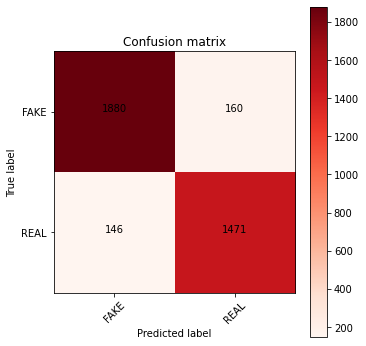

In [56]:
# Set the classifier for Logistic Regression
classifier=LogisticRegression(n_jobs=1, C=1e5, max_iter=10000)

# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

## Decision Tree

              precision    recall  f1-score   support

        FAKE       0.86      0.86      0.86      2040
        REAL       0.83      0.82      0.82      1617

    accuracy                           0.84      3657
   macro avg       0.84      0.84      0.84      3657
weighted avg       0.84      0.84      0.84      3657

Confusion matrix, without normalization


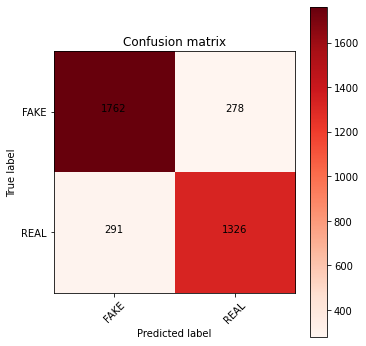

In [57]:
classifier = tree.DecisionTreeClassifier(random_state=17)
# Fit the model and display the metrics and confusion matrix
show_classifier_info(classifier)

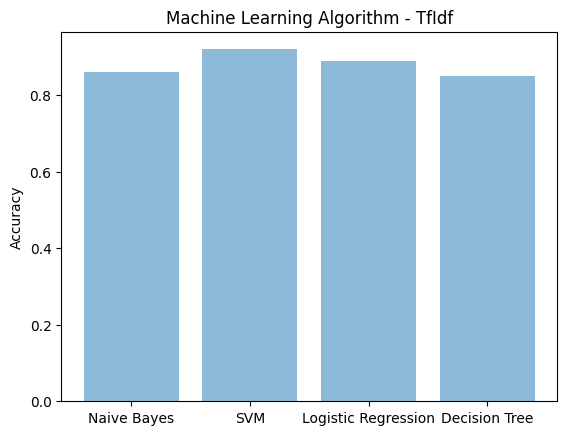

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Naive Bayes', 'SVM', 'Logistic Regression', 'Decision Tree')
y_pos = np.arange(len(objects))
performance = [0.86, 0.92, 0.89, 0.85]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Machine Learning Algorithm - TfIdf')

plt.show()

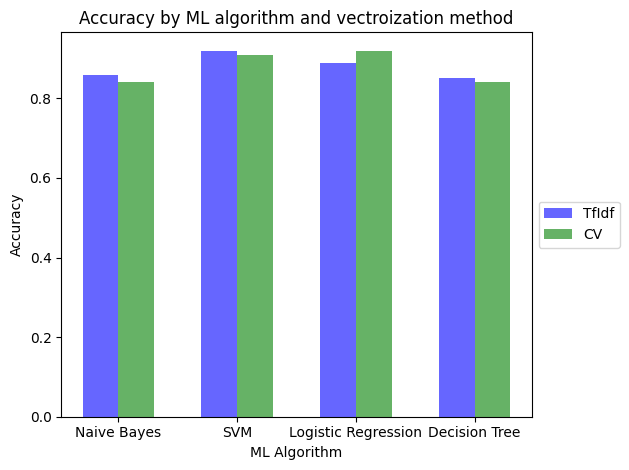

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
acc_tfidf = (0.86, 0.92, 0.89, 0.85)
acc_bow = (0.84, 0.91, 0.92, 0.84)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.6

rects1 = plt.bar(index, acc_tfidf, bar_width, alpha=opacity, color='b', label='TfIdf')

rects2 = plt.bar(index + bar_width, acc_bow, bar_width,alpha=opacity,color='g',label='CV')

plt.xlabel('ML Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy by ML algorithm and vectroization method')
plt.xticks(index + bar_width/2, ('Naive Bayes', 'SVM', 'Logistic Regression', 'Decision Tree'))
plt.legend()

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

<h4><center>Accuracy</center></h4>

|          | Naive Bayes | Support Vector Machine | Logistic Regression | Decision Tree |
|:--------:|:-----------:|:----------------------:|:-------------------:|:-------------:|
| TF-IDF   |     0.86    |          0.92          |         0.89        |      0.85     |
|   CV     |     0.84    |          0.91          |         0.92        |      0.84     |

| ML Algorithm           | TF-IDF | Count Vectorizer |
|:----------------------:|:------:|:----------------:|
| Naive Bayes            |  0.86  |       0.84       |
| Support Vector Machine |  0.92  |       0.91       |
| Logistic Regression    |  0.89  |       0.92       |
| Decision Tree          |  0.85  |       0.84       |

| ML Algorithm           | TF-IDF | Count Vectorizer |
|:----------------------:|:------:|:----------------:|
| Naive Bayes            |  0.59  |       0.60       |
| Support Vector Machine |  0.61  |       0.59       |
| Logistic Regression    |  0.55  |       0.59       |
| Decision Tree          |  0.55  |       0.55       |

In [82]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


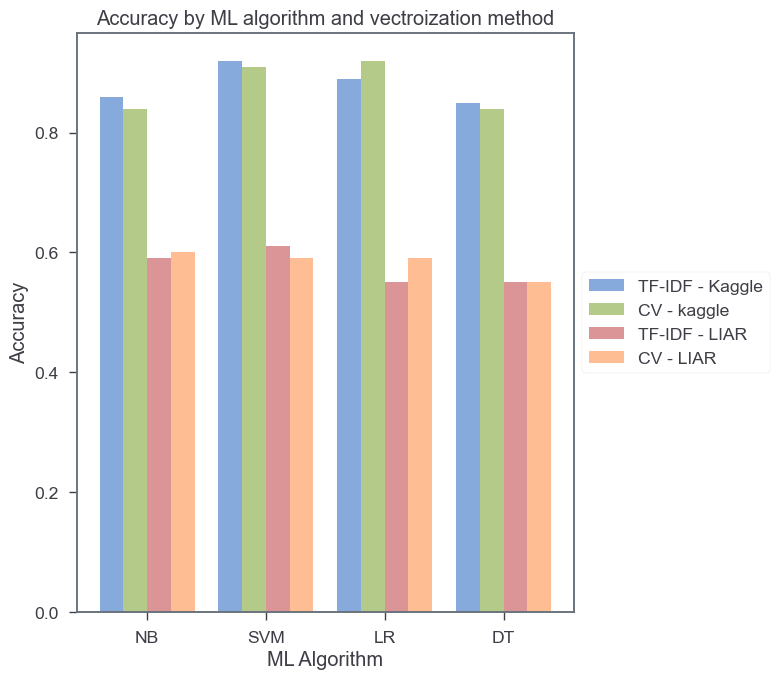

In [96]:
import numpy as np
import matplotlib.pyplot as plt

jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False) 

# data to plot
n_groups = 4
acc_tfidf_kaggle = (0.86, 0.92, 0.89, 0.85)
acc_bow_kaggle = (0.84, 0.91, 0.92, 0.84)
acc_tfidf_liar = (0.59, 0.61, 0.55, 0.55)
acc_bow_liar = (0.60, 0.59, 0.59, 0.55)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

rects1 = plt.bar(index, acc_tfidf_kaggle, bar_width, alpha=opacity, color='b', label='TF-IDF - Kaggle')
rects2 = plt.bar(index + bar_width, acc_bow_kaggle, bar_width,alpha=opacity,color='g',label='CV - kaggle')
rects3 = plt.bar(index + bar_width * 2, acc_tfidf_liar, bar_width,alpha=opacity,color='r',label='TF-IDF - LIAR')
rects4 = plt.bar(index + bar_width * 3, acc_bow_liar, bar_width,alpha=opacity,color='y',label='CV - LIAR')


plt.xlabel('ML Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy by ML algorithm and vectroization method')
plt.xticks(index + bar_width + 0.1, ('NB', 'SVM', 'LR', 'DT'))
plt.legend()

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

# Deep Learning

In [61]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\glavoy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.label, test_size = 0.2)

In [63]:
from nltk import word_tokenize

In [64]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [65]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

149279

In [66]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [67]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey actually saying reviewing emails

In [68]:
len(df.clean_joined[0])

2900

In [69]:
len(train_sequences[0])

38

In [70]:
len(df.clean[0])

368

In [71]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [72]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [60474 78529 60474   180   647   924  2102   756 32734  1630  3463   136
    16  1983    18     5  3224    81   947 78530   756 32734 78531   180
  2785     4   681 30803   436  5054    78 45116  5795  2016   604  2147
  3543  5298     0     0]
The padded encoding for document 2  is :  [78532  7563   892   935   290 78533  5662  1281    45  1407  5919    13
   237  7609   831 10421  1671  1281  1407   119  1281  7883   119  1310
  8327 11769     1  7884     1  2171  1820   203   612   486    29 78534
   247  4738   165   959]


In [73]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 64))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          9553856   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,784,513
Trainable params: 9,784,513
Non-trainable params: 0
_________________________________________________________________


In [74]:
total_words

149279

In [75]:
y_train = np.asarray(y_train)

In [76]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
206/206 [==============================] - 44s 200ms/step - loss: 0.3081 - acc: 0.8677 - val_loss: 0.1683 - val_acc: 0.9337
Epoch 2/2
206/206 [==============================] - 43s 209ms/step - loss: 0.0630 - acc: 0.9791 - val_loss: 0.1948 - val_acc: 0.9269


In [77]:
# make prediction
pred = model.predict(padded_test)

115/115 [==============================] - 4s 22ms/step


In [78]:
# if the predicted value is > 0.5 it is fake else it is real
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [79]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.921520371889527


<AxesSubplot:>

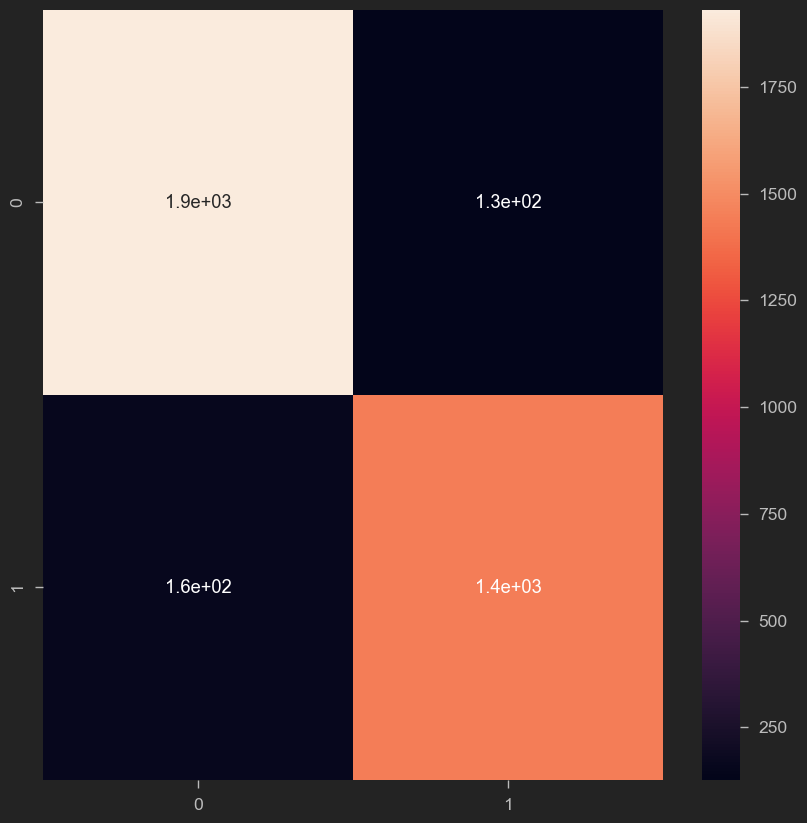

In [80]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)